In [2]:
import os
import pandas as pd
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Download NLTK resources (if not already downloaded)
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ProBook\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ProBook\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
data = os.path.abspath(os.path.join('.','data', 'data.csv'))

In [12]:
df= pd.read_csv(data)

In [13]:
df.head()

,Channel,AuthorID,Author,Date,Content,Attachments,Reactions
0,Ocean Protocol - CORE-TECH - 🌊┃builders [10887...,369700858742571008,mantisclone,03/29/2023 1:02 AM,gm 👋 :Water_Wave: :Oceancopy:,NaN,NaN
1,Ocean Protocol - CORE-TECH - 🌊┃builders [10887...,843831770062913568,white_rider_,03/29/2023 4:37 PM,Good morning to all the @🧑‍💻Builder 🌊,NaN,NaN
2,Ocean Protocol - CORE-TECH - 🌊┃builders [10887...,563434444321587202,Maki#4920,03/29/2023 4:37 PM,**@White Rider just advanced to level 4!**,https://cdn.discordapp.com/attachments/1088751...,powerup (1)
3,Ocean Protocol - CORE-TECH - 🌊┃builders [10887...,194817764236460034,robinlehmann,03/29/2023 4:40 PM,https://tenor.com/view/hello-there-baby-yoda-m...,NaN,babyyodasoup (1)
4,Ocean Protocol - CORE-TECH - 🌊┃builders [10887...,387401160656683034,birususama,03/29/2023 4:40 PM,Good morning everyone 😀,NaN,🌅 (1)


In [22]:
df.columns

Index(['Author', 'Date', 'Content'], dtype='object')

In [15]:
df=df[['Author','Date','Content']]

In [16]:
df.dropna(inplace=True)

### Data Preparation

In [17]:
# Define keywords related to technical issues
technical_keywords = ['error', 'bug', 'issue', 'problem', 'crash', 'not working']

# Filter messages containing technical keywords
technical_messages = df[df['Content'].str.contains('|'.join(technical_keywords), case=False)]

# Display the extracted technical messages
print(technical_messages[['Date', 'Author', 'Content']].head())

                   Date               Author  \
24  05/08/2023 11:21 PM           swish24_08   
25  05/09/2023 12:48 AM         white_rider_   
33   06/23/2023 9:52 PM            domingosl   
35  06/23/2023 10:17 PM           swish24_08   
39   06/28/2023 3:24 PM  bogdanoceanprotocol   

                                              Content  
24  you are correct, this is an issue in the docs....  
25        Sure thing, thanks for rising this issue 👍🏻  
33  Hello guys! I hope this is the right place to ...  
35  hei @DomingoSL can you please open this in #🐛┃...  
39  Hello @Filip | FELT Labs , the main reasons oc...  


### Text Analysis

In [18]:
# Tokenize messages and remove stopwords and punctuation
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Tokenize messages and remove stopwords and punctuation
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in stop_words and token not in punctuation]
    return tokens

# Concatenate the content of technical messages
all_technical_messages = ' '.join(technical_messages['Content'])

# Tokenize and preprocess the text
tokens = preprocess_text(all_technical_messages)

# Count the frequency of each token
token_counts = Counter(tokens)

# Display the most common tokens related to technical issues
print(token_counts.most_common(20))

[('data', 695), ('ocean', 686), ('issue', 350), ('https', 277), ("'s", 272), ('protocol', 260), ("''", 244), ('problem', 243), ('issues', 211), ('ai', 199), ('``', 179), ('error', 170), ('help', 153), ('please', 145), ("n't", 142), ('get', 138), ('also', 133), ('use', 128), ('would', 124), ('like', 120)]


### Categorization

In [19]:
# Define keywords indicative of user-related issues
user_related_keywords = ['user', 'user error', 'misunderstanding', 'knowledge', 'feature']

# Define keywords indicative of system-related issues
system_related_keywords = ['bug', 'error', 'crash', 'not working', 'technical problem']

# Define keywords indicative of external factors
external_factors_keywords = ['network issue', 'third-party service', 'external factor']

# Categorize technical issues based on keywords
user_related_issues = technical_messages[technical_messages['Content'].str.contains('|'.join(user_related_keywords), case=False)]
system_related_issues = technical_messages[technical_messages['Content'].str.contains('|'.join(system_related_keywords), case=False)]
external_factors_issues = technical_messages[technical_messages['Content'].str.contains('|'.join(external_factors_keywords), case=False)]

# Display counts and examples of each category
print("User-related issues:")
print(user_related_issues[['Date', 'Author', 'Content']].head())

print("\nSystem-related issues:")
print(system_related_issues[['Date', 'Author', 'Content']].head())

print("\nExternal factors issues:")
print(external_factors_issues[['Date', 'Author', 'Content']].head())

User-related issues:
                      Date         Author  \
57      03/24/2023 9:58 PM     cassette38   
59      04/05/2023 6:24 PM   white_rider_   
70     09/28/2023 10:18 PM   white_rider_   
16261   03/29/2023 4:34 PM  OceanGPT#0740   
17650   04/10/2023 2:14 AM        bg_maui   

                                                 Content  
57     🎉🎉🎉 We have some awesome technology updates, p...  
59     @everyone Greetings, oceaners 🌊! \n\nWe have s...  
70     @everyone 🚀 Introducing the Ocean Protocol CLI...  
16261  For both providers and consumers of data, bloc...  
17650  I've hit a roadblock with the remote setup of ...  

System-related issues:
                   Date        Author  \
42   07/31/2023 4:36 PM  white_rider_   
44   09/07/2023 6:43 PM   innopreneur   
45   09/07/2023 6:51 PM   innopreneur   
57   03/24/2023 9:58 PM    cassette38   
64  05/30/2023 10:34 PM  white_rider_   

                                              Content  
42  Details on this: \nveOC

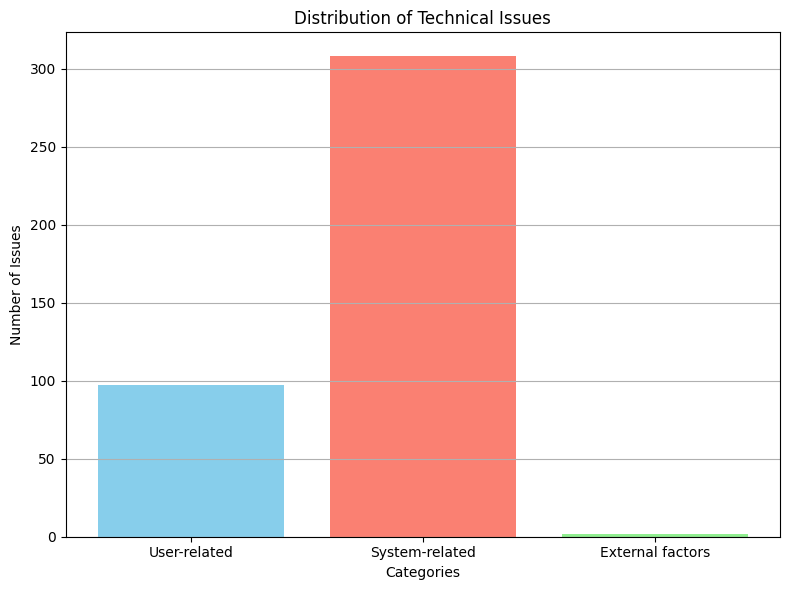

In [20]:
import matplotlib.pyplot as plt

# Define the categories and their corresponding counts
categories = ['User-related', 'System-related', 'External factors']
counts = [len(user_related_issues), len(system_related_issues), len(external_factors_issues)]

# Plotting
plt.figure(figsize=(8, 6))

# Create a bar plot
plt.bar(categories, counts, color=['skyblue', 'salmon', 'lightgreen'])

# Adding labels and title
plt.title('Distribution of Technical Issues')
plt.xlabel('Categories')
plt.ylabel('Number of Issues')

# Display the plot
plt.grid(axis='y')  # Add grid lines on y-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


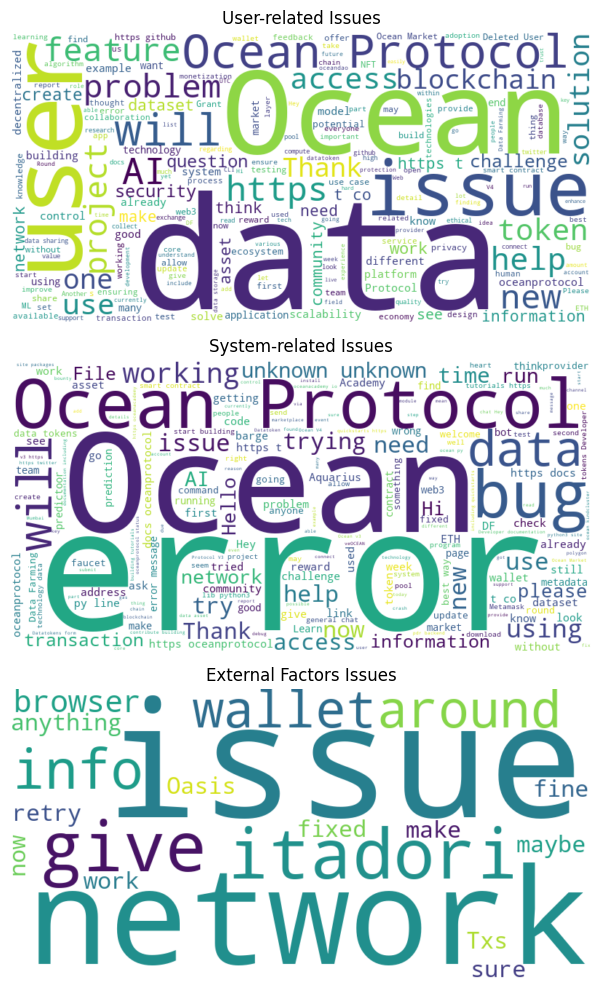

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate the content of messages for each category
user_related_text = ' '.join(user_related_issues['Content'])
system_related_text = ' '.join(system_related_issues['Content'])
external_factors_text = ' '.join(external_factors_issues['Content'])

# Generate word clouds for each category
wordcloud_user_related = WordCloud(width=800, height=400, background_color='white').generate(user_related_text)
wordcloud_system_related = WordCloud(width=800, height=400, background_color='white').generate(system_related_text)
wordcloud_external_factors = WordCloud(width=800, height=400, background_color='white').generate(external_factors_text)

# Plot the word clouds
plt.figure(figsize=(12, 10))

plt.subplot(3, 1, 1)
plt.imshow(wordcloud_user_related, interpolation='bilinear')
plt.title('User-related Issues')
plt.axis('off')

plt.subplot(3, 1, 2)
plt.imshow(wordcloud_system_related, interpolation='bilinear')
plt.title('System-related Issues')
plt.axis('off')

plt.subplot(3, 1, 3)
plt.imshow(wordcloud_external_factors, interpolation='bilinear')
plt.title('External Factors Issues')
plt.axis('off')

plt.tight_layout()
plt.show()
